# Baselines Ejemplificación
## Modelo de prueba
Con distancia interatómica de 2.78 Angstroms y hacemos un radcut de 25 A, y de igual manera lo visualizamos con jmol

In [1]:
from sys import path
import os
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

import myfuncions.core_shell_f as cs
import subprocess as sbp

coords = cs.cubeShell(17,2.78,'fcc')
coords = cs.sphericalShave(coords,25)
name='cube.xyz'
cs.tomakeshell_wxyz(coords,'Pt',name)
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name])

CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'cube.xyz'], returncode=0)

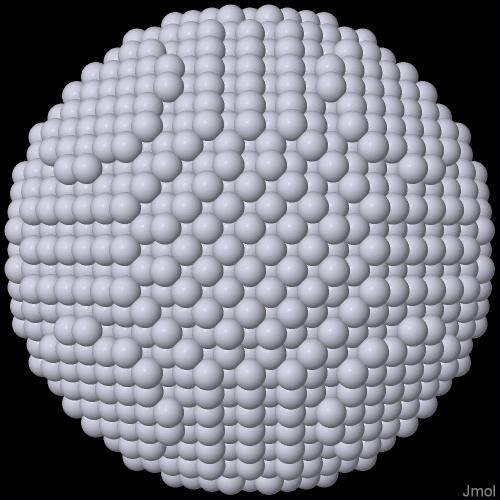

Hacemos el atpos y hacemos un .ini con lammpin
Nota: en caso de ser un .ini monoelemento es necesario cambiar manualmente 2 atom types en name.ini

In [6]:
atpos, eleList = cs.atpos_eleList_maker(coords,'Pt')
from myfuncions.lammpin_f import wlammpin

wlammpin(atpos,eleList,name)

cube.ini


In [18]:

input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library.meam Pt Ni ..\\..\\LAMMPS\\PtNiV2.pot Pt Ni 
 
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 300.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve

 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 
 fix 2 all langevin 300.0 300.0 0.5 32432
 run 1

 unfix 2
 timestep   0.001
 thermo		100
 fix		4 all langevin 300.0 300.0 0.5 87654
 dump           4 all xyz 1000 {name[:-4]}_d.xyz
 run		1000
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')

0

In [19]:
import PDF.runner as pdf
#name = 'ejem1.xyz'
pdf.run_pdf_noMD(f'{name[:-4]}_d.xyz', dir_actual, 2500,0.02,20,20)

c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\ejemplo\EjemplificiacionBaselines

 El tamaño del sistema supera los parametros    50.0027199      >    50.0000000    
        4388  atomos      9625078  pares 
 Rango de distancias    2.51729178     -   49.9970551    
 Distancias promedio    25.8595448    
 Factor de normalizacion    457920.875    



Hacemos la gráfica PDF

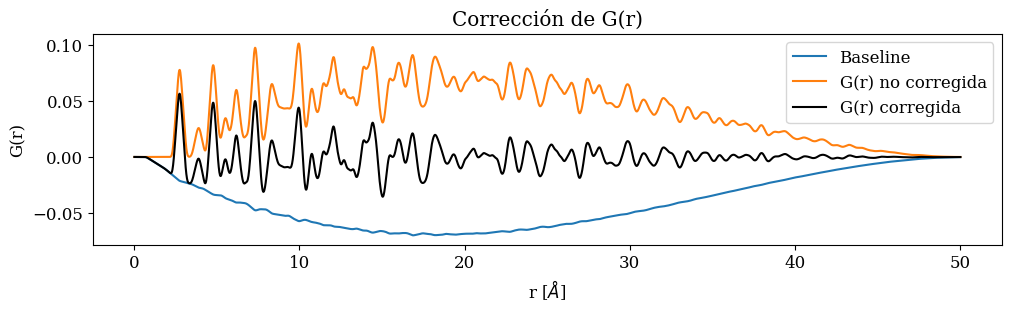

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


df_FCC= pd.read_csv(f'{name[:-4]}_d.txt', sep='\s+')


fig, ax =plt.subplots(figsize=(10,3), layout='constrained')
#ax.plot(df_FCC['#r(A)'], df_FCC['h(r)']/32, label='hist(r)')
ax.plot(df_FCC['#r(A)'], -df_FCC['Base'], label='Baseline')
ax.plot(df_FCC['#r(A)'], df_FCC['G(r)']+df_FCC['Base'],label='G(r) no corregida')
ax.plot(df_FCC['#r(A)'], df_FCC['G(r)'], label='G(r) corregida', color = 'black')


ax.set_xlabel('r [$\\AA$]')
#ax.set_xlim([0,6])
ax.set_ylabel('G(r)')
ax.set_title('Corrección de G(r)')
#ax.grid('True', linestyle='-')
ax.legend()
plt.rc('font', size=12)
plt.rcParams['font.family'] = 'serif'
plt.show()